<a href="https://colab.research.google.com/github/sudharson-c/ocv-projects/blob/main/License_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless pytesseract


In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,632 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,551 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Package

In [ ]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your license plate image


Saving images.jfif to images (1).jfif


In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.3 MB/s eta 0:00:00


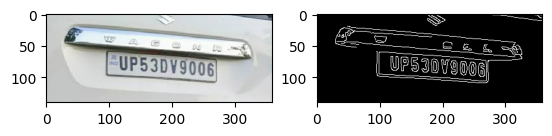

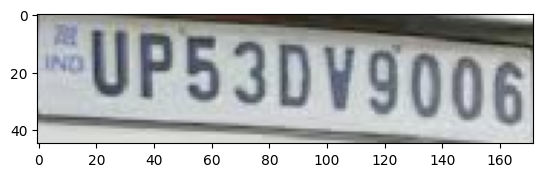

Tesseract OCR Result: UPS3GT40F
EasyOCR Result: UP5 30V9006


In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import easyocr

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Adjust for your environment

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found.")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 200)
    return image, edges

def find_license_plate(image, edges):
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    license_plate = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        if len(approx) == 4:  # Look for quadrilateral contours
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / float(h)
            if 2 < aspect_ratio < 5:  # Typical license plate aspect ratio range
                license_plate = image[y:y + h, x:x + w]
                break
    return license_plates

def recognize_text_from_plate(plate_image):
    if plate_image is None:
        raise ValueError("License plate region not found.")
    gray_plate = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray_plate, config='--psm 7')  # '7' for single-line text
    return text.strip()

def recognize_text_easyocr(license_plate):
    reader = easyocr.Reader(['en'])
    results = reader.readtext(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
    return results[0][-2] if results else "License plate not detected."

def main(image_path):
    try:
        image, edges = preprocess_image(image_path)
        plate_image = find_license_plate(image, edges)

        if plate_image is not None:
            plt.imshow(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))
            plt.title("Detected License Plate")
            plt.show()

            text = recognize_text_from_plate(plate_image)
            print(f"License Plate Text: {text}")
        else:
            print("License plate not detected.")
    except Exception as e:
        print(f"Error: {e}")

uploaded_image_path = list(uploaded.keys())[0]
main("images (1).jfif")

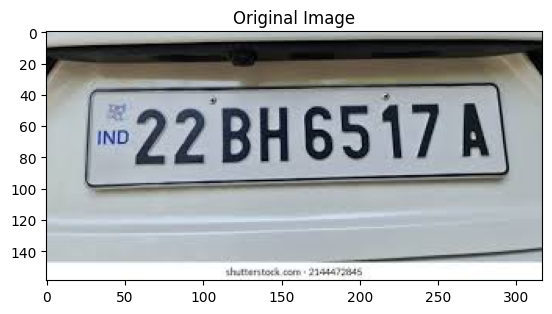

In [ ]:
import matplotlib.pyplot as plt

# Show the original image
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()
